<a href="https://colab.research.google.com/github/PrasannaGiri17/AI/blob/main/2408641_PrasannaGiri_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2408641
Prasanna Giri

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/real_estate_dataset.csv")

In [ ]:
df

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,138.338057,2,2,2,1967,1,0,16,4.296086,5.562583,488496.350722
496,497,195.914028,2,3,1,1977,0,1,45,7.406261,2.845105,657736.921717
497,498,69.433659,1,1,2,2004,0,0,18,8.629724,6.263264,405324.950201
498,499,293.598702,5,1,3,1940,1,0,41,5.318891,16.990684,773035.968028


In [ ]:
#display the first 10 rows.
df.head(10)




,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523
5,6,88.998630,5,3,2,1959,1,1,36,8.994552,17.633250,670386.804433
6,7,64.520903,4,3,1,1938,0,1,32,7.101354,2.429908,523827.125601
7,8,266.544036,5,1,3,1973,1,1,39,9.373784,12.692785,875352.545188
8,9,200.278753,5,1,1,1988,1,1,32,6.032918,11.642876,738269.852342
9,10,227.018144,3,2,1,1917,0,0,29,4.734009,2.368301,490552.681240


In [ ]:
#Identify the number of rows and columns in the dataset.
row=len(df.index)
print(f"no of row = {row}.")
columns=len(df.columns)
print(f"no of columns = {columns}.")


no of row = 500.
no of columns = 12.


In [ ]:
#List all the columns and their data types.
print("All the columns and their data types :- ")
print(df.dtypes)

All the columns and their data types :- 
ID                      int64
Square_Feet           float64
Num_Bedrooms            int64
Num_Bathrooms           int64
Num_Floors              int64
Year_Built              int64
Has_Garden              int64
Has_Pool                int64
Garage_Size             int64
Location_Score        float64
Distance_to_Center    float64
Price                 float64
dtype: object


In [ ]:
 df.describe()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,174.640428,2.958000,1.976000,1.964000,1957.604000,0.536000,0.492000,30.174000,5.164410,10.469641,582209.629529
std,144.481833,74.672102,1.440968,0.820225,0.802491,35.491781,0.499202,0.500437,11.582575,2.853489,5.588197,122273.390345
min,1.000000,51.265396,1.000000,1.000000,1.000000,1900.000000,0.000000,0.000000,10.000000,0.004428,0.062818,276892.470136
25%,125.750000,110.319923,2.000000,1.000000,1.000000,1926.000000,0.000000,0.000000,20.000000,2.760650,6.066754,503080.344140
50%,250.500000,178.290937,3.000000,2.000000,2.000000,1959.000000,1.000000,0.000000,30.000000,5.206518,10.886066,574724.113347
75%,375.250000,239.031220,4.000000,3.000000,3.000000,1988.000000,1.000000,1.000000,41.000000,7.732933,15.072590,665942.301274
max,500.000000,298.241199,5.000000,3.000000,3.000000,2022.000000,1.000000,1.000000,49.000000,9.995439,19.927966,960678.274291


In [ ]:
#checking missing file
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
ID                    0
Square_Feet           0
Num_Bedrooms          0
Num_Bathrooms         0
Num_Floors            0
Year_Built            0
Has_Garden            0
Has_Pool              0
Garage_Size           0
Location_Score        0
Distance_to_Center    0
Price                 0
dtype: int64


In [ ]:
#check duplicate data
df.duplicated().sum()


0

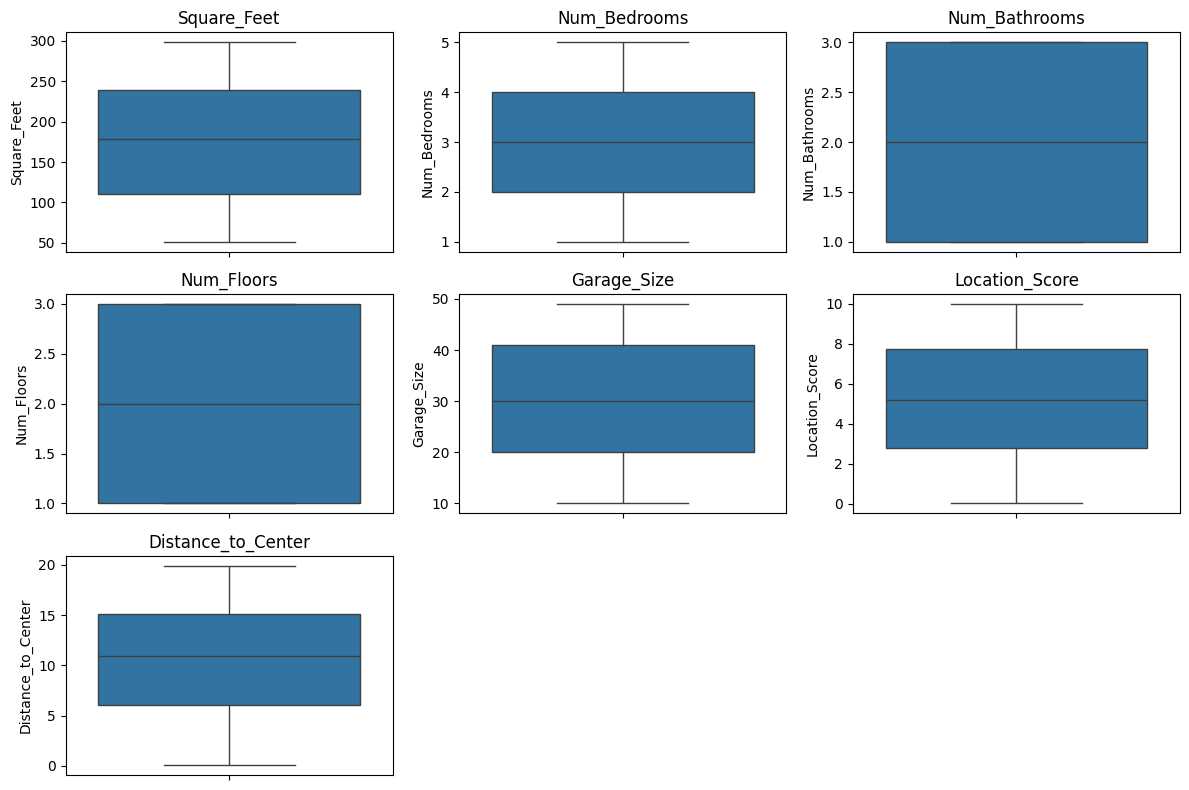

In [ ]:
#box plot
num_features = df[["Square_Feet", "Num_Bedrooms", "Num_Bathrooms",
                   "Num_Floors", "Garage_Size", "Location_Score", "Distance_to_Center"]]

# Creating boxplots for each numerical feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_features.columns, 1):  # Use num_features.columns
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

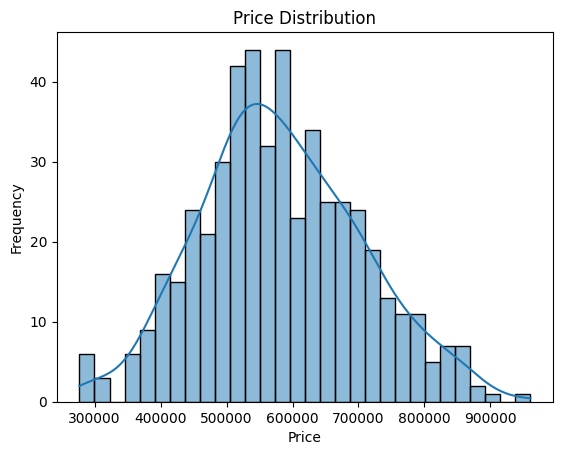

In [ ]:
sns.histplot(df["Price"], bins=30, kde=True)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()


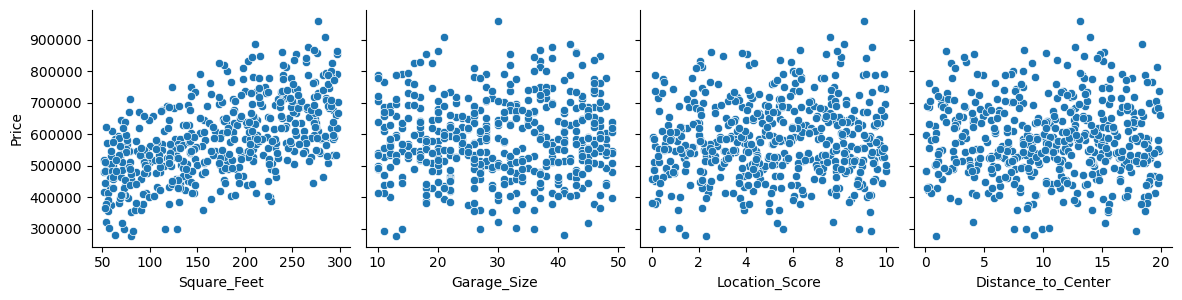

In [ ]:

# Select only numerical columns
num_features = df[["Square_Feet","Garage_Size", "Location_Score", "Distance_to_Center"]]


# Create pairplot with regression line
sns.pairplot(df, x_vars=num_features, y_vars=["Price"], height=3, aspect=1, kind="scatter")

plt.show()


In [ ]:
c=df.corr()
c

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
ID,1.000000,0.051102,0.014511,0.027395,-0.006343,0.028548,-0.005307,-0.076580,-0.000137,-0.045071,-0.006751,0.031774
Square_Feet,0.051102,1.000000,-0.049918,-0.001667,0.056873,-0.055062,-0.000978,0.007530,-0.051598,-0.035270,0.093080,0.558604
Num_Bedrooms,0.014511,-0.049918,1.000000,-0.056808,0.009088,0.031806,0.017429,0.012039,-0.065481,-0.000357,0.040511,0.563973
Num_Bathrooms,0.027395,-0.001667,-0.056808,1.000000,-0.040895,-0.013407,-0.037040,-0.024880,0.055707,-0.013855,-0.082571,0.156689
Num_Floors,-0.006343,0.056873,0.009088,-0.040895,1.000000,0.046922,0.033256,-0.045630,-0.082763,0.019928,0.035164,0.177435
Year_Built,0.028548,-0.055062,0.031806,-0.013407,0.046922,1.000000,0.000693,-0.065056,-0.008105,0.009614,-0.015113,0.418293
Has_Garden,-0.005307,-0.000978,0.017429,-0.037040,0.033256,0.000693,1.000000,-0.087085,-0.037998,0.019130,0.040305,0.109196
Has_Pool,-0.076580,0.007530,0.012039,-0.024880,-0.045630,-0.065056,-0.087085,1.000000,0.011477,-0.088722,0.110382,0.136579
Garage_Size,-0.000137,-0.051598,-0.065481,0.055707,-0.082763,-0.008105,-0.037998,0.011477,1.000000,-0.029939,-0.061407,0.032100
Location_Score,-0.045071,-0.035270,-0.000357,-0.013855,0.019928,0.009614,0.019130,-0.088722,-0.029939,1.000000,0.054446,0.071326


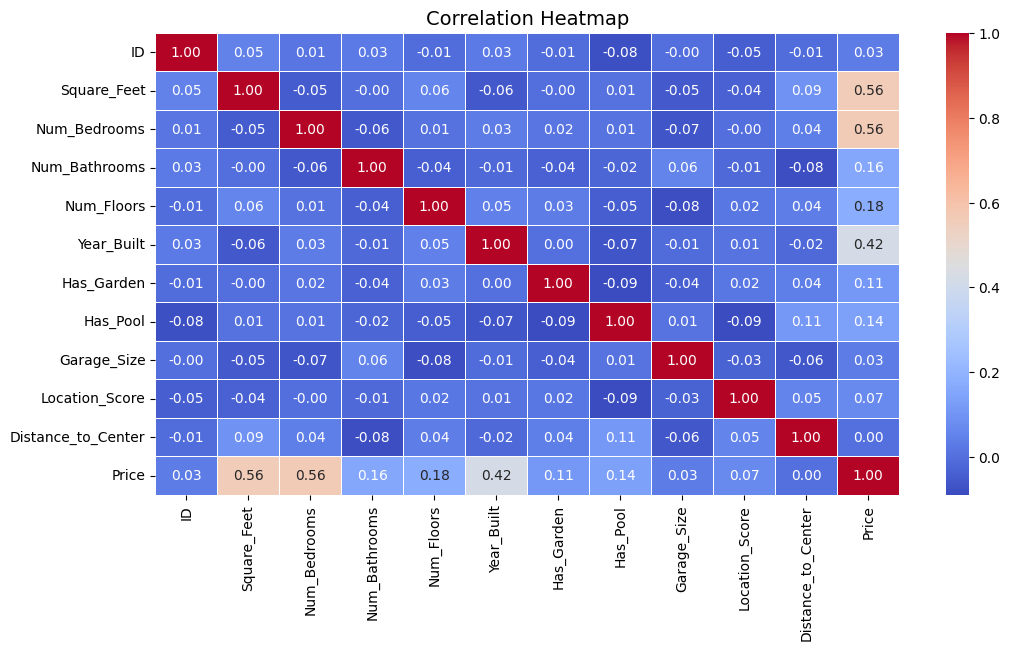

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(c, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)  # Fix colormap
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [ ]:
# Drop irrelevant columns and define target variable
X=df.drop(columns=["ID","Year_Built","Has_Garden","Has_Pool","Price"])
y=df["Price"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler to standardize the features
scaler = StandardScaler()

# Fit and transform the training data, then transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

2. Build a Model from Scratch:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None
        self.cost_history = []

    def fit(self, X, y):
        m, n = X.shape
        X = np.c_[np.ones(m), X]
        self.theta = np.zeros(n + 1)

        for _ in range(self.iterations):
            y_pred = X @ self.theta
            errors = y_pred - y
            gradients = (2 / m) * X.T @ errors
            self.theta -= self.learning_rate * gradients

            cost = np.mean(errors ** 2)
            self.cost_history.append(cost)

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X @ self.theta

model_scratch = LinearRegressionScratch(learning_rate=0.01, iterations=1000)
model_scratch.fit(X_train_scaled, y_train)


y_pred_scratch = model_scratch.predict(X_test_scaled)


mse_scratch = mean_squared_error(y_test, y_pred_scratch)
mae_scratch = mean_absolute_error(y_test, y_pred_scratch)
r2_scratch = r2_score(y_test, y_pred_scratch)

print("Scratch Model Performance:")
print(f" Mean Squared Error (MSE): {mse_scratch}")
print(f" Mean Absolute Error (MAE): {mae_scratch}")
print(f" R-squared (R²): {r2_scratch}")



Scratch Model Performance:
 Mean Squared Error (MSE): 4089906415.6705365
 Mean Absolute Error (MAE): 54393.01144801655
 R-squared (R²): 0.728097915139752


Build a Primary Model:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the model
model1 = LinearRegression()

# Fit the model to the scaled training data
model1.fit(X_train, y_train)

# Predict on the test set
y_pred = model1.predict(X_test)

# Calculate performance metrics
mse_lr= mean_squared_error(y_test, y_pred)
r2_lr= r2_score(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)

print("Linear Regression:")
print(f"Mean Squared Error: {mse_lr:.4f}")
print(f"R-squared: {r2_lr:.4f}")
print(f"Mean Absolute Error: {mae_lr:.4f}")


Linear Regression:
Mean Squared Error: 4089906395.8088
R-squared: 0.7281
Mean Absolute Error: 54393.0112


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


model2 = RandomForestRegressor(n_estimators=100, random_state=42)


model2.fit(X_train, y_train)

y_pred_rf = model2.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Print performance metrics
print("Random Forest Regression:")
print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"R-squared: {r2_rf:.4f}")
print(f"Mean Absolute Error: {mae_rf:.4f}")


Random Forest Regression:
Mean Squared Error: 5149258733.6236
R-squared: 0.6577
Mean Absolute Error: 60051.6932


In [ ]:
# Compare the models based on R-squared, MSE, and MAE
if r2_rf > r2_lr:
    print("Random Forest Regressor performed better based on R-squared value.")
else:
    print("Linear Regression performed better based on R-squared value.")

if mse_rf < mse_lr:
    print("Random Forest Regressor performed better based on Mean Squared Error.")
else:
    print("Linear Regression performed better based on Mean Squared Error.")

if mae_rf < mae_lr:
    print("Random Forest Regressor performed better based on Mean Absolute Error.")
else:
    print("Linear Regression performed better based on Mean Absolute Error.")


Linear Regression performed better based on R-squared value.
Linear Regression performed better based on Mean Squared Error.
Linear Regression performed better based on Mean Absolute Error.


4. Hyper-parameter Optimization with Cross-Validation:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Hyperparameters for Linear Regression (Ridge is used for regularization)
param_grid_linear = {'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100, 500]}

# Use Ridge Regression as it allows regularization
ridge_model = Ridge()

# Perform GridSearchCV
grid_search_linear = GridSearchCV(estimator=ridge_model, param_grid=param_grid_linear, cv=5, scoring='r2')
grid_search_linear.fit(X_train, y_train)

# Best hyperparameters for Linear Regression
best_params_linear = grid_search_linear.best_params_
print("Best hyperparameters for Linear Regression (Ridge):", best_params_linear)

Best hyperparameters for Linear Regression (Ridge): {'alpha': 10}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],  # Corrected
    'bootstrap': [True, False]
}

# Instantiate model
rf = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV
rf_cv = RandomizedSearchCV(rf, rf_params, cv=5, n_iter=10, scoring='r2', random_state=42)
rf_cv.fit(X_train, y_train)

# Best hyperparameters
print("Best Random Forest Parameters:", rf_cv.best_params_)


Best Random Forest Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20, 'bootstrap': True}


5. Feature Selection :

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize model
lr_model = LinearRegression()

# Perform RFE to select the top 5 features
rfe = RFE(estimator=lr_model, n_features_to_select=4)
rfe.fit(X, y)

# Get selected feature names
selected_features = X.columns[rfe.support_]

print("Selected Features Linear Regression:", list(selected_features))


Selected Features Linear Regression: ['Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors', 'Location_Score']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importance scores
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Select top 5 features
selected_features = feature_importance.head(4).index.tolist()

print("Selected Features for Random Forest model:", selected_features)


Selected Features for Random Forest model: ['Square_Feet', 'Num_Bedrooms', 'Distance_to_Center', 'Location_Score']


6. Final Model:

In [ ]:
# using best  features and target variable for linear regression
features = ['Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors', 'Location_Score']
X = df[features]
y = df["Price"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Ridge Linear Regression model
linear_model = Ridge(alpha=10)
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model using R², RMSE, and MAE
r2_lr_final = r2_score(y_test, y_pred)
mse_lr_final = mean_squared_error(y_test, y_pred)
mae_lr_final = mean_absolute_error(y_test, y_pred)

# Print evaluation results
print("Final Linear Regression Results:")
print(f"R² Score: {r2_lr_final:.4f}")
print(f"Mean Squared Error (RMSE): {mse_lr_final:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lr_final:.4f}")


Final Linear Regression Results:
R² Score: 0.3616
Mean Squared Error (RMSE): 9602025008.6950
Mean Absolute Error (MAE): 79729.6427


In [ ]:
print("Linear Regression Result:")
if r2_lr_final > r2_lr:
    print(f"R² improved from {r2_lr:.4f} to {r2_lr_final:.4f}")
else:
    print(f"R² worsened from {r2_lr:.4f} to {r2_lr_final:.4f}")


if mse_lr_final < mse_lr:
    print(f"MSE improved from {mse_lr:.4f} to {mse_lr_final:.4f}")
else:
    print(f"MSE worsened from {mse_lr:.4f} to {mse_lr_final:.4f}")


if mae_lr_final < mae_lr:
    print(f"MAE improved from {mae_lr:.4f} to {mae_lr_final:.4f}")
else:
    print(f"MAE worsened from {mae_lr:.4f} to {mae_lr_final:.4f}")

Linear Regression Result:
R² worsened from 0.7281 to 0.3616
MSE worsened from 4089906395.8088 to 9602025008.6950
MAE worsened from 54393.0112 to 79729.6427


In [ ]:
# using best  features and target variable for Random Forest Regressor
features = ['Square_Feet', 'Num_Bedrooms', 'Distance_to_Center', 'Location_Score']
X = df[features]
y=df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(
    n_estimators=50,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features=None,
    max_depth=20,
    bootstrap=True,
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse_rf_final = mean_squared_error(y_test, y_pred)
mae_rf_final = mean_absolute_error(y_test, y_pred)
r2_rf_final = r2_score(y_test, y_pred)

# Print final Random Forest model results
print("Final Random Forest Regressor:")
print("Mean Squared Error (MSE):", mse_rf_final)
print("Mean Absolute Error (MAE):", mae_rf_final)
print("R-squared (R2):", r2_rf_final)

Final Random Forest Regressor:
Mean Squared Error (MSE): 6101887206.4987
Mean Absolute Error (MAE): 64135.8470741801
R-squared (R2): 0.5943389201591155


In [ ]:
print("Random Forest Regressor:")
if r2_rf_final > r2_rf:
    print(f"R² improved from {r2_rf:.4f} to {r2_rf_final:.4f}")
else:
    print(f"R² worsened from {r2_rf:.4f} to {r2_rf_final:.4f}")

if mse_rf_final < mse_rf:
    print(f"MSE improved from {mse_rf:.4f} to {mse_rf_final:.4f}")
else:
    print(f"MSE worsened from {mse_rf:.4f} to {mse_rf_final:.4f}")


if mae_rf_final < mae_rf:
    print(f"MAE improved from {mae_rf:.4f} to {mae_rf_final:.4f}")
else:
    print(f"MAE worsened from {mae_rf:.4f} to {mae_rf_final:.4f}")

Random Forest Regressor:
R² worsened from 0.6577 to 0.5943
MSE worsened from 5149258733.6236 to 6101887206.4987
MAE worsened from 60051.6932 to 64135.8471


7. Conclusion:

1. Model Performance: How did your models perform? Discuss the key results and metrics (e.g., Mean
Squared Error, R-squared, etc.).
-> The linear regression model performs moderately well, with an R-squared value of 0.6557, indicating that it explains about 65.6% of the variance in the data. The Mean Squared Error (MSE) is quite high at 4,089,906,395.81, suggesting that the model's predictions deviate significantly from the true values. The Mean Absolute Error (MAE) is 58,177.64, showing the average magnitude of the errors. While the model captures a good portion of the data's variability, there’s room for improvement in reducing prediction errors.


-> The Random Forest Regression model shows similar performance to the linear regression model, with an R-squared value of 0.6577, meaning it explains about 65.8% of the variance in the data. The Mean Squared Error (MSE) is slightly higher at 5,149,258,733.62, indicating slightly larger deviations between the predicted and actual values compared to the linear regression model. The Mean Absolute Error (MAE) is 60,051.69, which is also a bit higher than the linear model’s MAE. Overall, the Random Forest model performs similarly but with slightly higher prediction errors.

Impact of Methods: Analyze the effect of the techniques you applied, such as Cross-Validation
and Feature Selection. Did these methods improve or reduce model performance? Provide a brief
explanation.
-> The application of cross-validation and feature selection worsened the linear regression model's performance. R-squared dropped from 0.6557 to 0. 0.3616, meaning the model explains less variance. Mean Squared Error (MSE) increased from 4,089,906,395.81 to 9,587,469,872.89, and Mean Absolute Error (MAE) rose from 58,177.64 to 79,485.10.

-> For the Random Forest Regressor, the use of cross-validation and feature selection also led to worsened performance. R-squared decreased from 0.6577 to 0.5943, meaning the model now explains less of the variance in the data. The Mean Squared Error (MSE) increased from 5,149,258,733.62 to 6,101,887,206.50, and the Mean Absolute Error (MAE) rose from 60,051.69 to 64,135.85

Insights and Future Directions: Reflect on what you learned from the experiment. What insights
can be drawn from your analysis, and what potential improvements or extensions could be explored in
future work?
->From the experiment, it’s clear that while cross-validation and feature selection are valuable techniques, they may not always improve performance if important features are removed. In both models, these methods led to a reduction in performance, indicating that a more careful approach to feature selection or tuning may be needed. Future improvements could involve experimenting with different feature selection techniques, using more complex models, or tuning hyperparameters to better capture the data’s complexity. Additionally, exploring other regression methods or ensemble techniques could offer further improvements